In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_csv('placedata v2.0 synthetic.csv')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('bright')

In [5]:
data = pd.read_csv('placedata v2.0 synthetic.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [6]:
data.drop(columns='StudentID', inplace=True)
# x.head()

In [7]:
data.describe().round(2)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,7.70,1.05,2.03,1.01,79.45,4.32,69.16,74.50
std,0.64,0.67,0.87,0.90,8.16,0.41,10.43,8.92
min,6.50,0.00,0.00,0.00,60.00,3.00,55.00,57.00
25%,7.40,1.00,1.00,0.00,73.00,4.00,59.00,67.00
50%,7.70,1.00,2.00,1.00,80.00,4.40,70.00,73.00
75%,8.20,1.00,3.00,2.00,87.00,4.70,78.00,83.00
max,9.10,2.00,3.00,3.00,90.00,4.80,90.00,88.00


In [8]:
data.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [9]:
numerical_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_cols = [feature for feature in data.columns if data[feature].dtype == 'O']

categorical_classes = {}

In [10]:
numerical_cols

['CGPA',
 'Internships',
 'Projects',
 'Workshops/Certifications',
 'AptitudeTestScore',
 'SoftSkillsRating',
 'SSC_Marks',
 'HSC_Marks']

In [11]:
categorical_cols

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

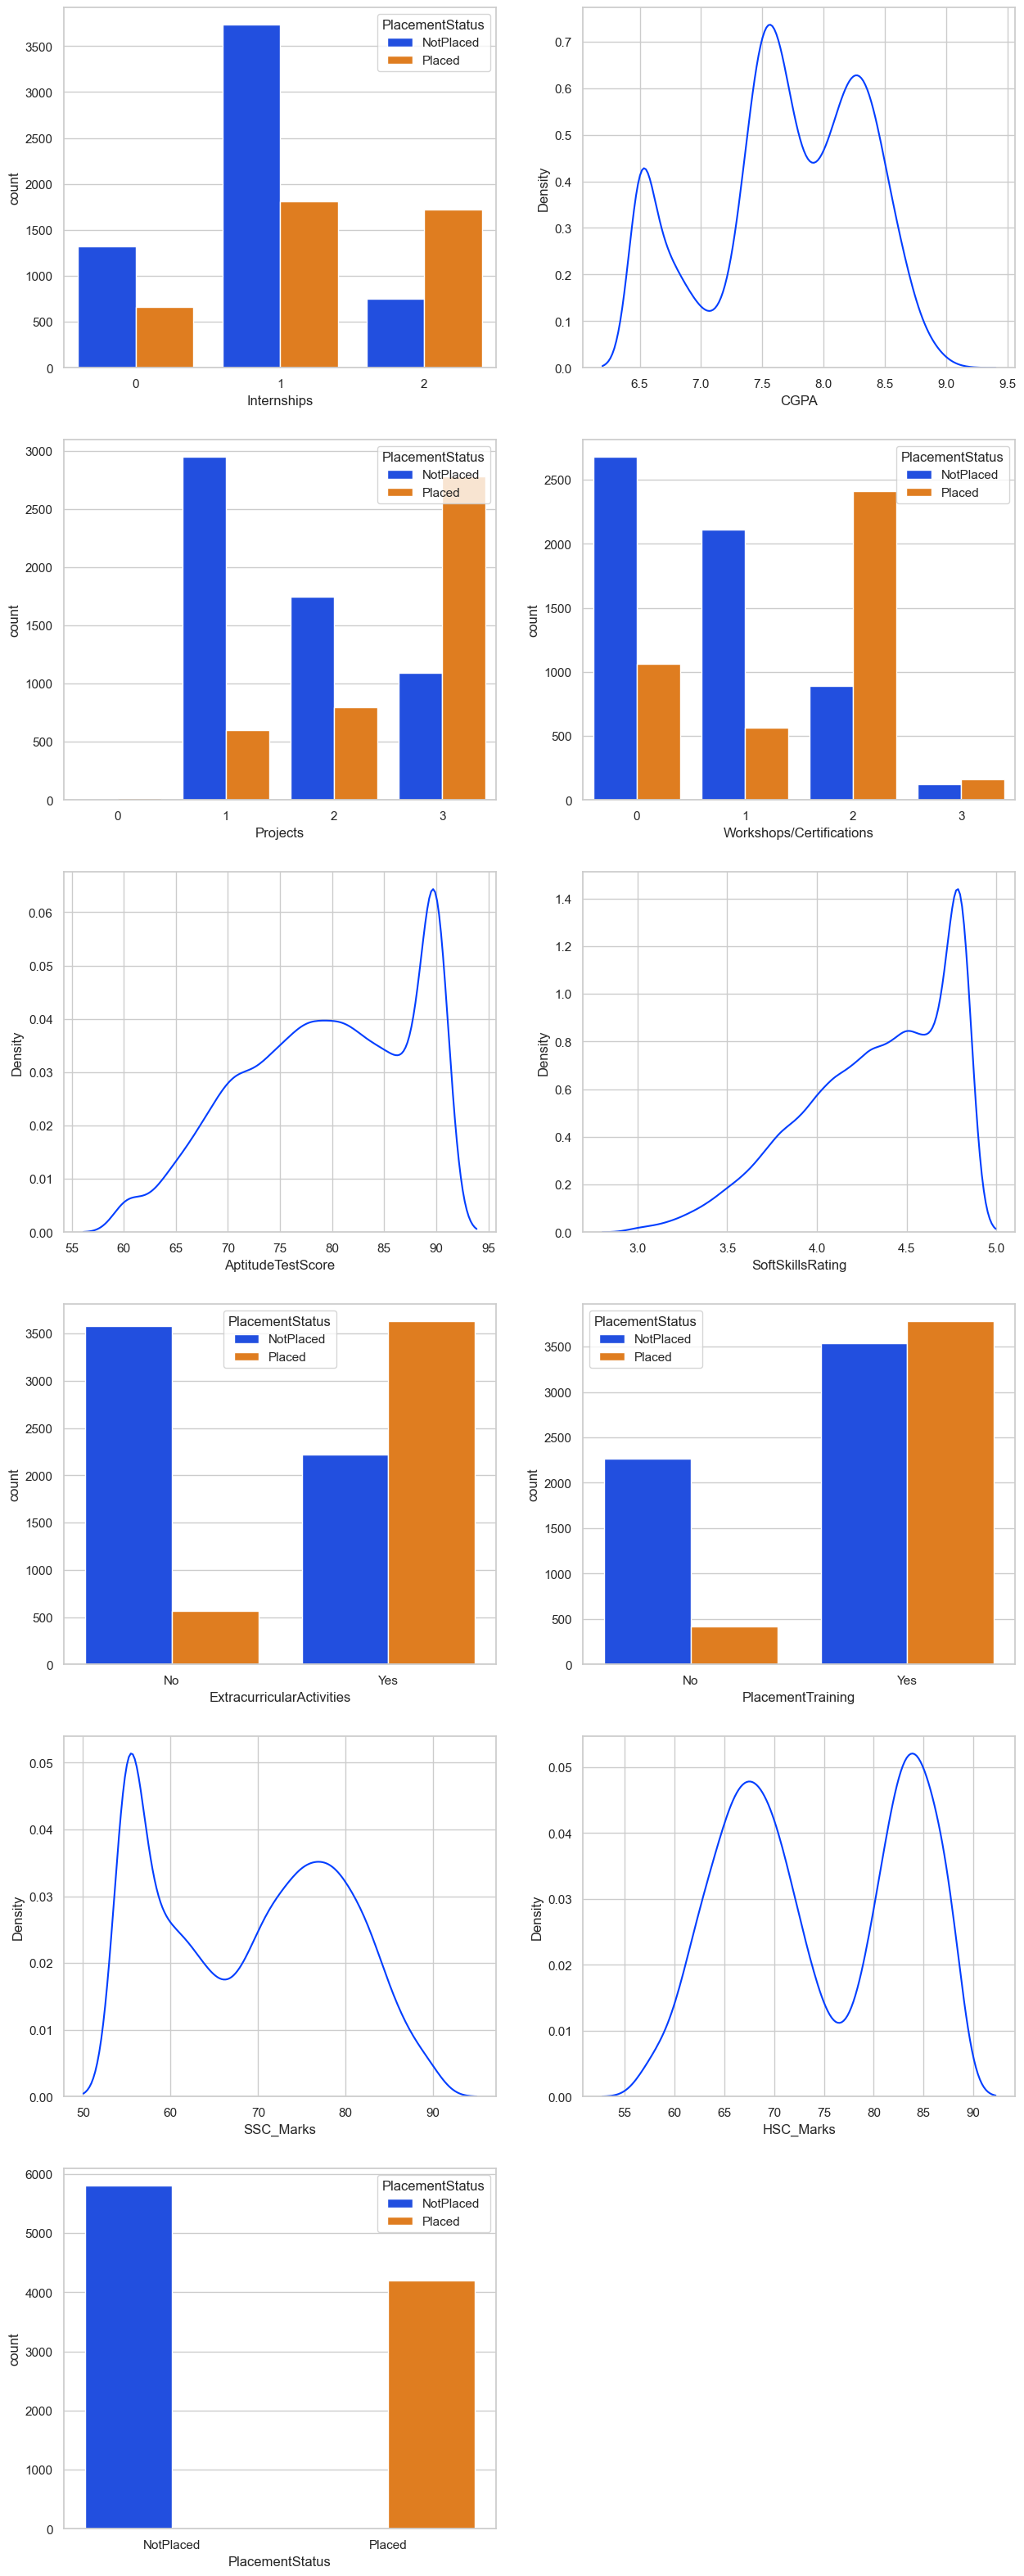

In [12]:
fig, ax = plt.subplots(6, 2)
fig.set_figheight(40)
fig.set_figwidth(15)

sns.countplot(x=data['Internships'], ax=ax[0,0], hue=data['PlacementStatus'])
sns.kdeplot(data['CGPA'], ax=ax[0,1])
sns.countplot(x=data['Projects'], ax=ax[1,0], hue=data['PlacementStatus'])
sns.countplot(x=data['Workshops/Certifications'], ax=ax[1,1], hue=data['PlacementStatus'])
sns.kdeplot(data['AptitudeTestScore'], ax=ax[2,0])
sns.kdeplot(data['SoftSkillsRating'], ax=ax[2,1])
sns.countplot(x=data['ExtracurricularActivities'], ax=ax[3,0], hue=data['PlacementStatus'])
sns.countplot(x=data['PlacementTraining'], ax=ax[3,1], hue=data['PlacementStatus'])
sns.kdeplot(data['SSC_Marks'], ax=ax[4,0])
sns.kdeplot(data['HSC_Marks'], ax=ax[4,1])
sns.countplot(x=data['PlacementStatus'], ax=ax[5,0], hue=data['PlacementStatus'])
ax[5,1].set_axis_off()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
for i in categorical_cols:
  if i != 'PlacementStatus':
    data[i] = le.fit_transform(data[i])
    categorical_classes[i] = le.classes_

data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,1,1,78,82,Placed
2,7.3,1,2,2,82,4.8,1,0,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,1,1,81,80,Placed
4,8.3,1,2,2,86,4.5,1,1,74,88,Placed


In [15]:
categorical_classes

{'ExtracurricularActivities': array(['No', 'Yes'], dtype=object),
 'PlacementTraining': array(['No', 'Yes'], dtype=object)}

In [16]:
correlation_matrix = data.drop(labels=['PlacementStatus'], axis=1).corr()
correlation_matrix

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572
PlacementTraining,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.533572,0.325434,0.524916,1.000000


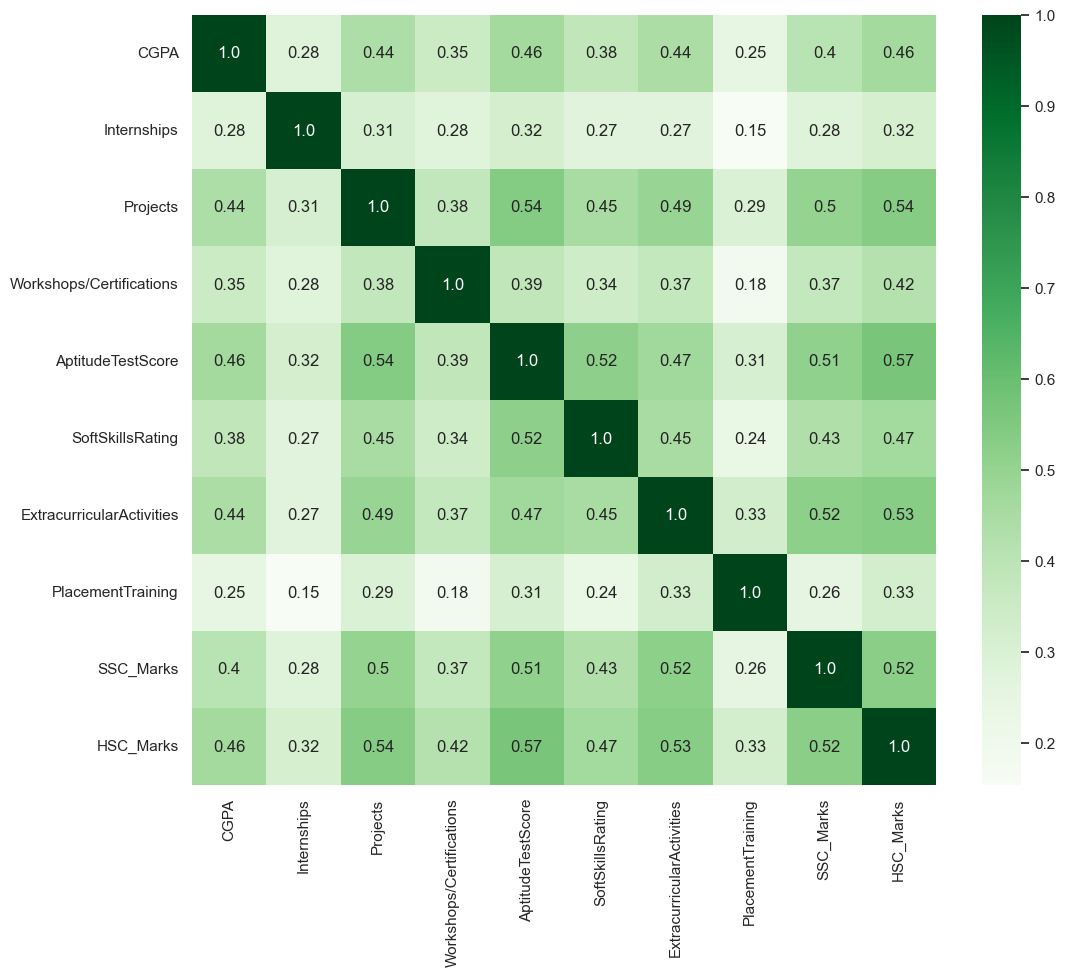

In [17]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sns.heatmap(correlation_matrix, annot=True, fmt=".2", cmap='Greens')
plt.show()

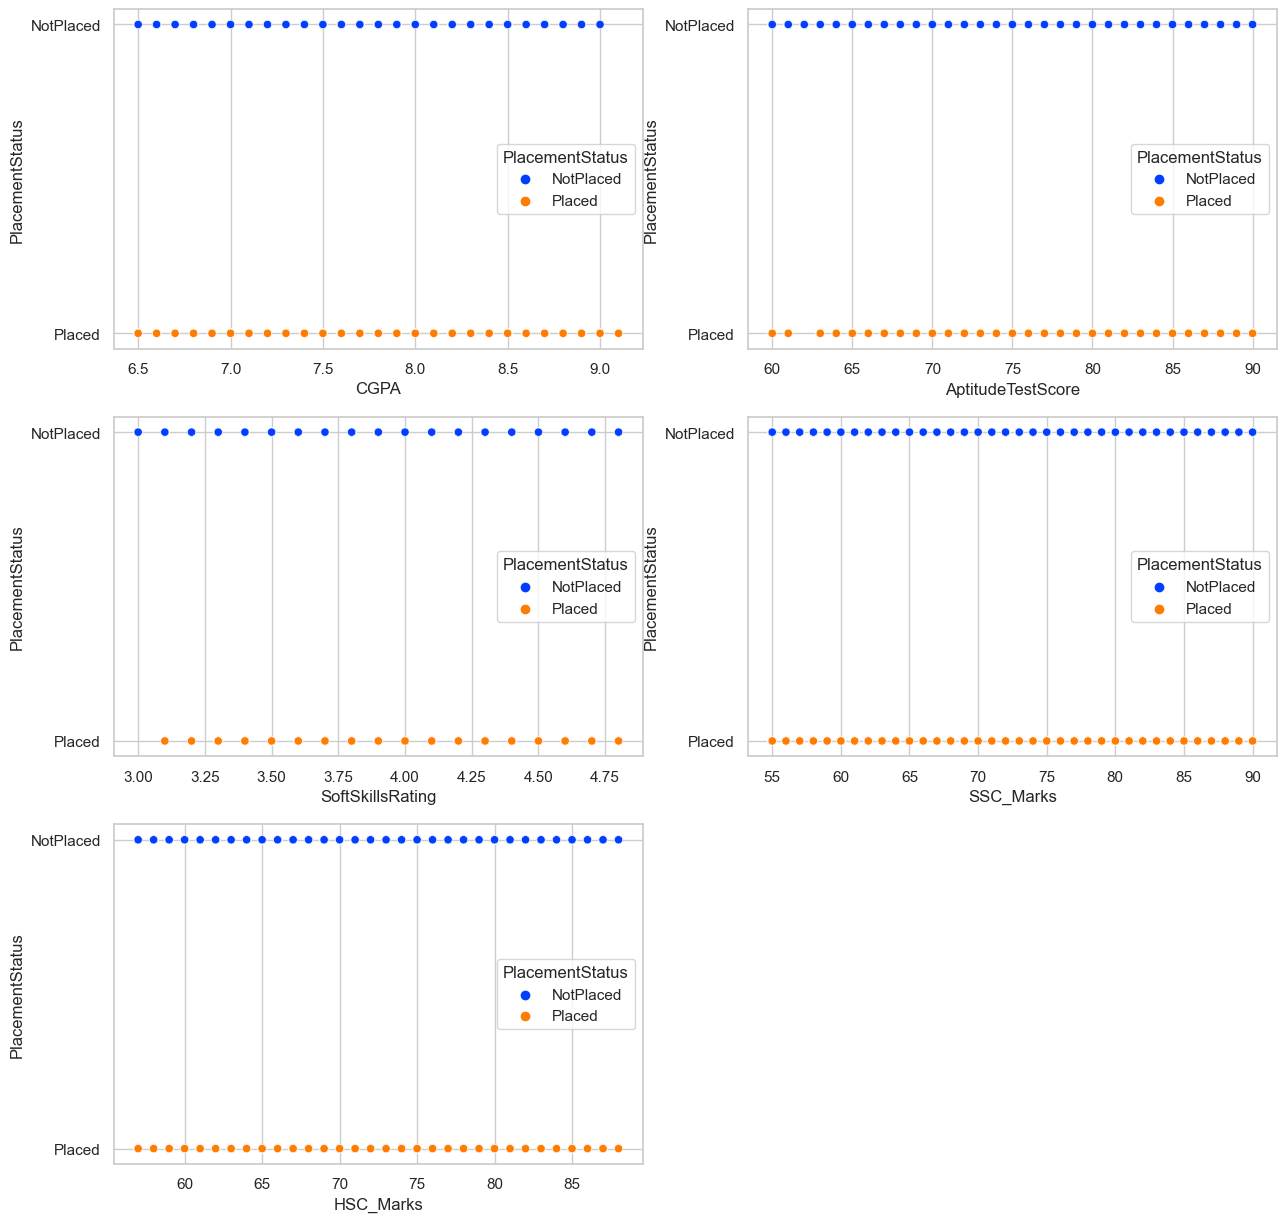

In [18]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(15)
fig.set_figheight(15)

sns.scatterplot(x=data['CGPA'], y=data['PlacementStatus'], ax=ax[0,0], hue=data['PlacementStatus'])
sns.scatterplot(x=data['AptitudeTestScore'], y=data['PlacementStatus'], ax=ax[0,1], hue=data['PlacementStatus'])
sns.scatterplot(x=data['SoftSkillsRating'], y=data['PlacementStatus'], ax=ax[1,0], hue=data['PlacementStatus'])
sns.scatterplot(x=data['SSC_Marks'], y=data['PlacementStatus'], ax=ax[1,1], hue=data['PlacementStatus'])
sns.scatterplot(x=data['HSC_Marks'], y=data['PlacementStatus'], ax=ax[2,0], hue=data['PlacementStatus'])
ax[2,1].set_axis_off()

plt.show()

In [19]:
x=data.drop(labels=['PlacementStatus'], axis=1)
x 



,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [20]:
y=data.PlacementStatus
y 

0       NotPlaced
1          Placed
2       NotPlaced
3          Placed
4          Placed
          ...    
9995    NotPlaced
9996       Placed
9997       Placed
9998       Placed
9999    NotPlaced
Name: PlacementStatus, Length: 10000, dtype: object

In [21]:
categorical_cols.remove('PlacementStatus')
categorical_cols

['ExtracurricularActivities', 'PlacementTraining']

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

<Axes: >

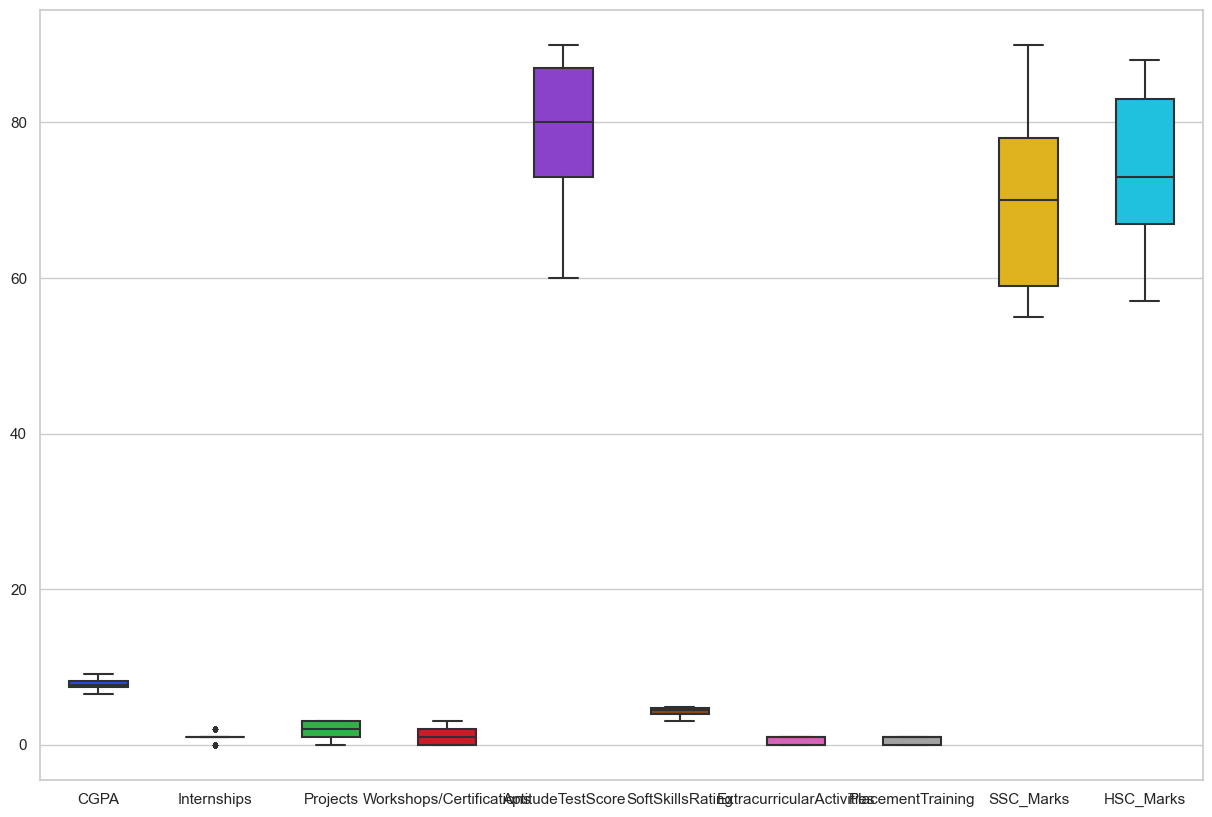

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=x, width= 0.5,ax=ax,  fliersize=3)

In [24]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehotencoder', OneHotEncoder())
    ]
)

In [25]:
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train=preprocessor.fit_transform(x_train)
x_train
x_test=preprocessor.transform(x_test)

<Axes: >

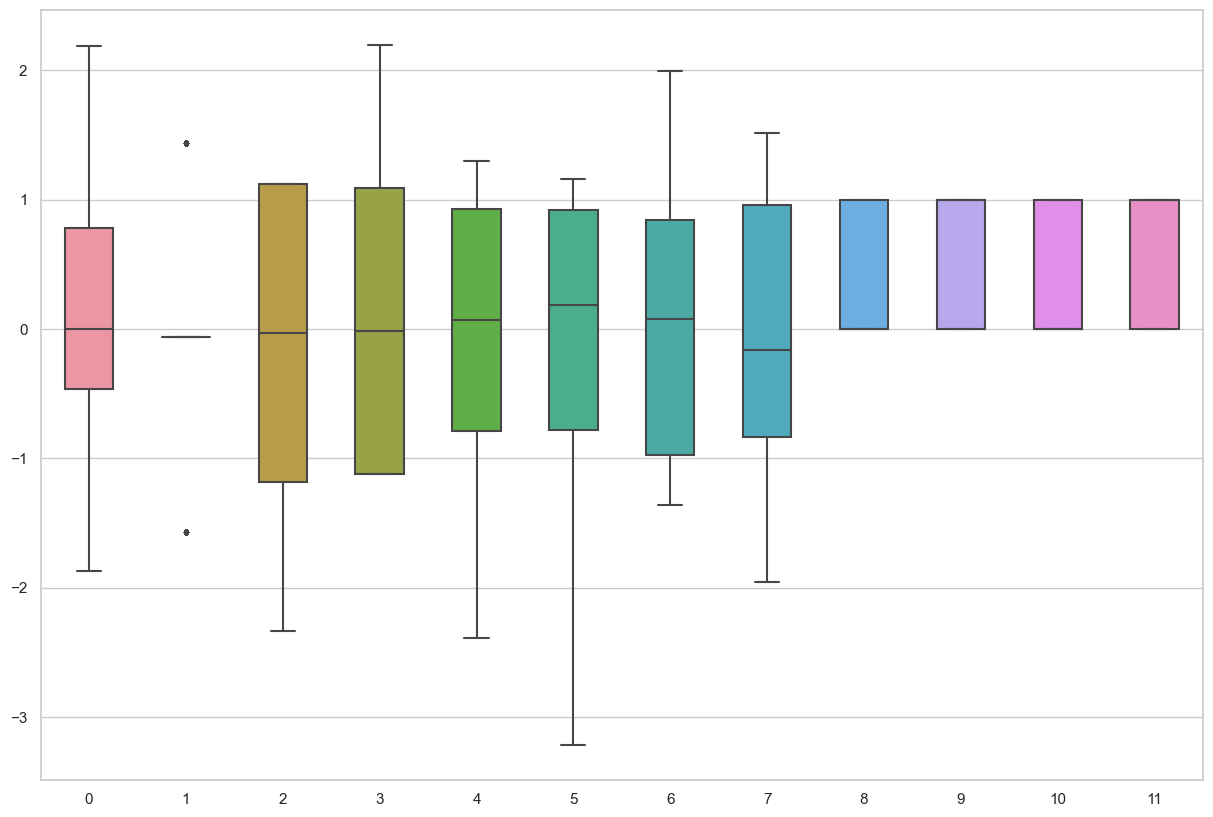

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=x_train , width= 0.5,ax=ax,  fliersize=3)

In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
models={
    'logistic_regression':LogisticRegression(),
    'support_vector':SVC(),
    'random_forest':RandomForestClassifier(),
    'decision_tree':DecisionTreeClassifier(),
    'KNN':KNeighborsClassifier(),
    'Adaboost':AdaBoostClassifier(n_estimators=25)
}

In [36]:
from sklearn.metrics import accuracy_score
def evaluate_model(x_train, y_train, x_test, y_test, models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test)
        test_model_score=accuracy_score(y_test, y_pred)
        report[list(models.keys())[i]]=test_model_score
    return report 

In [37]:
evaluate_model(x_train, y_train, x_test, y_test, models)

{'logistic_regression': 0.7945,
 'support_vector': 0.7945,
 'random_forest': 0.7835,
 'decision_tree': 0.73,
 'KNN': 0.7705,
 'Adaboost': 0.7925}

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
clf=SVC(kernel='linear')
param={'C':[0.1, 1, 10, 100, 1000],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       'kernel':['linear']
       }

In [39]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(clf, param_distributions=param, scoring='accuracy', cv=5, verbose=3)
cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.782 total time=  15.7s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.801 total time=  15.2s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.786 total time=  15.4s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.821 total time=  15.9s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.811 total time=  14.4s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.782 total time=  15.9s
[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.801 total time=  14.1s
[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.786 total time=  14.2s
[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.821 total time=  14.6s
[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.811 total time=  14.3s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.781 total time=   0.8s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear']},
                   scoring='accuracy', verbose=3)

In [40]:
y_predi=cv.predict(x_test)

In [41]:
accuracy_score(y_test, y_predi)

0.7955

In [42]:
confusion_matrix(y_test, y_predi)

array([[953, 219],
       [190, 638]], dtype=int64)

In [43]:
classification_report(y_test, y_predi)

'              precision    recall  f1-score   support\n\n   NotPlaced       0.83      0.81      0.82      1172\n      Placed       0.74      0.77      0.76       828\n\n    accuracy                           0.80      2000\n   macro avg       0.79      0.79      0.79      2000\nweighted avg       0.80      0.80      0.80      2000\n'